In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
locations = pd.read_csv('C:/Users/sched/Documents/Uni/Digital Humanities/UE - Introduction to DH Tools and Methods/Own Dataset/Arno Schmidt_locations.csv', sep =';')

works = pd.read_csv('C:/Users/sched/Documents/Uni/Digital Humanities/UE - Introduction to DH Tools and Methods/Own Dataset/Arno Schmidt_works.csv', sep = ';')

In [3]:
locations.head()

,address,location,state,country,category,moved_in,moved_out
0,Rumpffsweg 27,Hamm,Nordrhein-Westfalen,Germany,city,1914,1928
1,Laubaner Walkgasse 12,Lauban,Schlesien,Prussia,city,1928,1938
2,Greiffenberger Schützenstraße 4,Greiffenberg,Niederschlesien,Prussia,city,1938,1940
3,Arras-Kaserne,Hirschberg,Sudetenland,Germany,city,1940,1941
4,Garnison Hagenau,Hagenau,Elsass,Germany,city,1941,1941


In [77]:
works.head()

,title,year,reference_location,protagonist
0,Gadir oder erkenne dich,1949,dungeon,dreams about escaping from dungeon
1,Enthymesis,1949,desert,escapes on his own into the desert
2,Brand's Haide,1951,village Blakenhof,spends his time after the war in the rural are...
3,Schwarze Spiegel,1951,deserted wasteland,wanders through a fictious German wasteland af...
4,Aus dem Leben eines Fauns,1953,abandoned cottage,retreats into an abandoned cottage


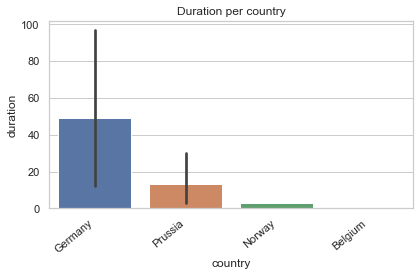

In [5]:
sb.set_theme(style="whitegrid")
plt.title("Duration per country")
locations['duration'] = locations.moved_out - locations.moved_in
vis1 = sb.barplot(x="country", y="duration", data = locations, estimator = sum)
vis1.set_xticklabels(vis1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

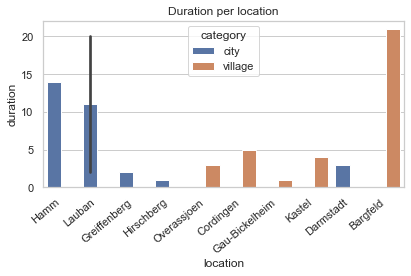

In [10]:
locations_without_0 = locations[locations.duration != 0]
plt.title("Duration per location")
vis2 = sb.barplot(x="location", y="duration", data = locations_without_0, estimator = sum, hue = "category")
vis2.set_xticklabels(vis2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

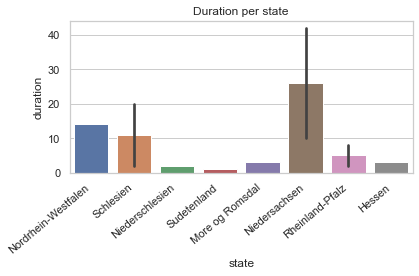

In [8]:
locations_without_0 = locations[locations.duration != 0]
plt.title("Duration per state")
vis3 = sb.barplot(x="state", y="duration", data = locations_without_0, estimator = sum)
vis3.set_xticklabels(vis3.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

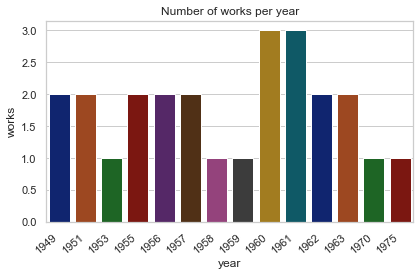

In [16]:
works_grouped = works.groupby("year").count().reset_index("year")
works_grouped
plt.title("Number of works per year")
vis4 = sb.barplot(x="year", y="title", data = works_grouped, palette="dark")
vis4.set_xticklabels(vis4.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.ylabel("works")
plt.show()

In [106]:
works['bargfeld'] = works.reference_location.str.contains('Bargfeld')
works.loc[works['bargfeld'] == True]

,title,year,reference_location,protagonist,bargfeld
13,Kaff auch Mare Crisium,1960,Bargfeld,dreams about owning a house in Bargfeld,True
15,Windmühlen,1960,south of Bargfeld,wanders with a friend through the countryside,True
20,Piporakemes!,1962,house in Bargfeld,owns a house in Bargfeld,True
24,Abend mit Goldrand,1975,house in Bargfeld,lives with other seniors in a house at the edg...,True


In [17]:
city = locations.loc[locations['category'] == "city"].groupby("category")["address"].count().reset_index("category")
city

In [14]:
village = locations.loc[locations['category'] == "village"].groupby("category")["address"].count().reset_index("category")
village

,category,address
0,village,4


In [21]:
city_duration = locations.loc[locations['category'] == "city"].groupby("category")["duration"].sum().reset_index("category")
city_duration

,category,duration
0,city,31


In [23]:
village_duration = locations.loc[locations['category'] == "village"].groupby("category")["duration"].sum().reset_index("category")
village_duration

,category,duration
0,village,34
